# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
# Make sure imports get reloaded before executing ensuring changes are reloaded
%load_ext autoreload
%autoreload 2

In [2]:
# Seeding so that experiment is reproducible
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [3]:
# Plotting helper functions
import matplotlib.pyplot as plt
import math
%matplotlib inline
from IPython.display import clear_output

def live_plot(data_points, title="", legend="", text=""):
    """Plot live data points while it is training"""
    clear_output(wait=True)
    plt.figure()
    plt.subplot(211)
    plt.title(title, loc='left', y=1.08)
    plt.plot(range(len(data_points)), data_points, label = legend)
    plt.legend()
    
    percent = math.ceil(len(data_points) * 0.2)
    avgs = "Average rewards - total {0:.2f}, first {1} epochs {2:.2f}, last {1} epochs: {3:.2f}".format(
        np.mean(data_points), percent, np.mean(data_points[:percent]), np.mean(data_points[-percent:])
    )
    plt.figtext(0.125,0.37, avgs, horizontalalignment='left')
    plt.figtext(0.125,0.43, text, horizontalalignment='left')
    plt.show();
    
def plot_rewards(rewards, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    plt.plot(rewards); 
    plt.title("Rewards", loc='left', y=1.08);
    rolling_mean = pd.Series(rewards).rolling(rolling_window).mean()
    plt.plot(rolling_mean);
    return rolling_mean


In [4]:
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

In [5]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [9]:
import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 7.5                                    # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])  # initial angle velocities
target_pose = np.array([0., 0., 30.])  # target pose
file_output = 'data.txt'                         # file name for saved results

In [7]:
# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pose)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

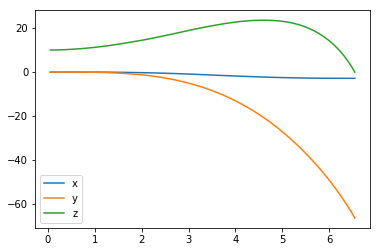

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

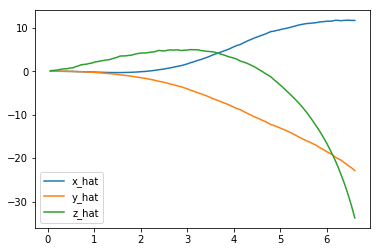

In [8]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

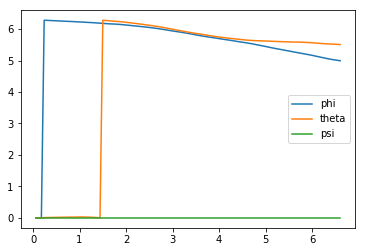

In [9]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

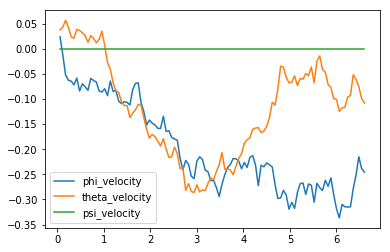

In [10]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

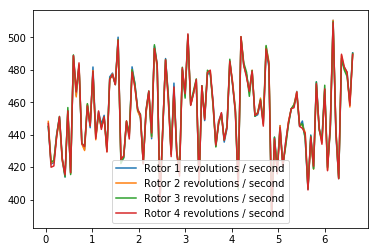

In [11]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [12]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 29.32665256 -48.28204808   0.           4.99294037   5.50853663
   0.        ]
[ 11.69965494 -22.85987888 -33.76392071]
[-0.24587681 -0.108349    0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

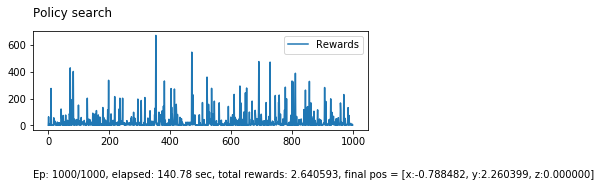

In [12]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task
import time
from IPython.display import clear_output

num_episodes = 1000
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pose)
agent = PolicySearch_Agent(task)
ps_rewards = []

start_time = time.time()

description = "Policy search"

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action) 
        agent.step(reward, done)
        state = next_state
        if done:
            ps_rewards.append(agent.total_reward)
#             print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
#                 i_episode, agent.score, agent.best_score, agent.noise_scale), end="")
            update_txt = ""\
                "Ep: {0:}/{1}, "\
                "elapsed: {2:.2f} sec, "\
                "total rewards: {3:5f}, "\
                "final pos = [x:{4:4f}, y:{5:4f}, z:{6:4f}]".format(
                i_episode, 
                num_episodes,
                (time.time() - start_time),
                agent.total_reward, 
                state[0], 
                state[1], 
                state[2])         
            live_plot(ps_rewards, title=description, legend="Rewards", text=update_txt)
            break
    sys.stdout.flush()

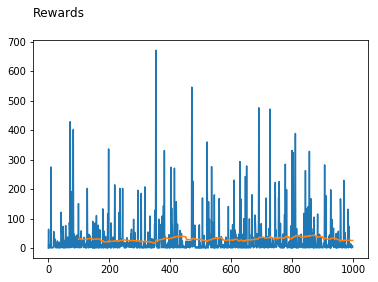

In [13]:
rolling_mean = plot_rewards(ps_rewards)

In [14]:
print('Average reward of all epochs {}'.format(np.mean(ps_rewards)))

Average reward of all epochs 29.7722430050951


In [15]:
print('Average reward of the first 200 epochs {}'.format(np.mean(ps_rewards[:200])))

Average reward of the first 200 epochs 27.074753788751924


In [16]:
print('Average reward of the last 200 epochs {}'.format(np.mean(ps_rewards[-200:])))

Average reward of the last 200 epochs 31.998503726069384


This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [6]:
## TODO: Train your agent here.
import sys
import pandas as pd
from task import Task
from agents.ddpg.agent import DDPG
from agents.ddpg.critic import Critic
from agents.ddpg.actor import Actor
import time

def RunDDPGAgent(episodes = 10, actor_nn_architecture = [32, 64], critic_nn_architecture = [32,64], plot_freq = 20):
    """Setup a DDPG Agent and trains it.
    
    =======
    """

    # Setup same scenario of policy search agent
    task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pose)

    num_episodes = episodes
    # task = Task(target_pos=target_pos)
    agent = DDPG(task, actor_nn_architecture= actor_nn_architecture, critic_nn_architecture= critic_nn_architecture)
    ddpg_rewards = []
    
    description = "Actor-Critic {} episodes, Actor NN: {}, Critic NN: {}".format(
        episodes, actor_nn_architecture, critic_nn_architecture)

    start_time = time.time()
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        count = 0
        while True:
            count += 1 
            action = agent.act(state)
            next_state, reward, done = task.step(action) 

            agent.step(action, reward, next_state, done)
            state = next_state
            if done:
                ddpg_rewards.append(agent.total_reward)
                
                if(i_episode % plot_freq == 0):
                    time_so_far = (time.time() - start_time)
                    update_txt = ""\
                        "Ep: {0:}/{1}, "\
                        "elapsed: {2:.2f} sec, "\
                        "epoch/sec: {7:.2f}, "\
                        "total rewards: {3:5f}, "\
                        "final pos = [x:{4:4f}, y:{5:4f}, z:{6:4f}]".format(
                        i_episode, 
                        num_episodes,
                        time_so_far,
                        agent.total_reward, 
                        state[0], 
                        state[1], 
                        state[2],
                        (float(i_episode) / time_so_far)
                    )         
                    live_plot(ddpg_rewards, title=description, legend="Rewards", text=update_txt)

                break
        sys.stdout.flush()
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    
    return (num_episodes, actor_nn_architecture, critic_nn_architecture, agent, ddpg_rewards, elapsed_time)

Using TensorFlow backend.


## Actor-Critic model evaluation

The following code tries different NN hidden layer configurations for both the Actor and the Critic.

**It starts with a fix Critic** while measuring the performance of **various Actor** configurations.

At the end of the Actor evaluation, **the best Actor NN** configuration **is fixed** while **changing the Critic** configuration.

In [7]:
# Variable holding the outcome of each run
outputs = []

# Number of episodes
episodes = 1000

# Frequency of plot refresh based on no. epochs
plot_freq = 50

# Neural Network hidden layer size to try on both the Actor and the Critic
# Note: the Critic uses two hidden layer branches, one for the actions and
# one for the state, the below will be applied to each strand.
configs = [
    [32,64],
    [32,64,32],
    [32,32,32],
    [64,64], 
    [64, 64, 32], 
    [64, 64, 64], 
    [32, 32, 32, 32], 
    [64, 128], 
    [32, 64, 128]]

## Actor evaluation, fix Critic

### 1. Actor NN [32, 64]

Training an Actor-Critic model over 1000 episodes.

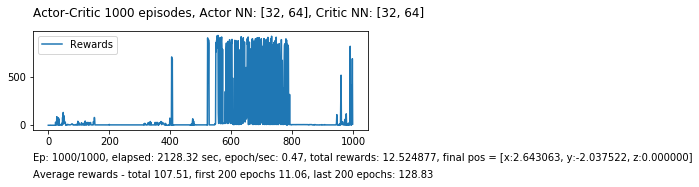

In [75]:
outputs.append(RunDDPGAgent(episodes, configs[0], configs[0], plot_freq = plot_freq))

### 2. Actor NN [32, 64, 32]

Training an Actor-Critic model over 1000 episodes.

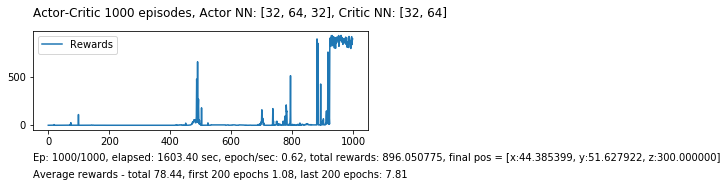

In [15]:
outputs.append(RunDDPGAgent(episodes, configs[1], configs[0], plot_freq = plot_freq))

### 3. Actor NN [32, 32, 32]

Training an Actor-Critic model over 1000 episodes.

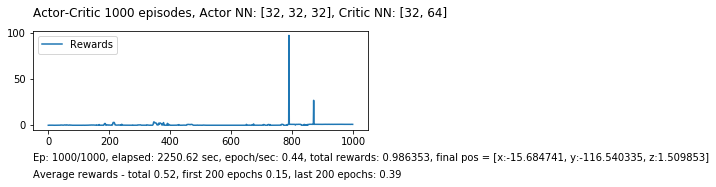

In [77]:
outputs.append(RunDDPGAgent(episodes, configs[2], configs[0], plot_freq = plot_freq))

### 4. Actor NN [64, 64]

Training an Actor-Critic model over 1000 episodes.

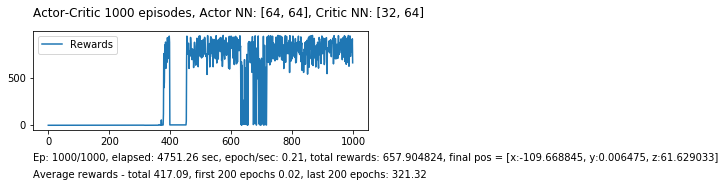

In [ ]:
outputs.append(RunDDPGAgent(episodes, configs[3], configs[0], plot_freq = plot_freq))

### 5. Actor NN [64, 64, 32]

Training an Actor-Critic model over 1000 episodes.

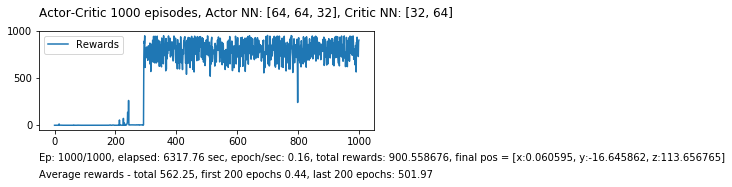

In [ ]:
outputs.append(RunDDPGAgent(episodes, configs[4], configs[0], plot_freq = plot_freq))

### 6. Actor NN [64, 64, 64]

Training an Actor-Critic model over 1000 episodes.

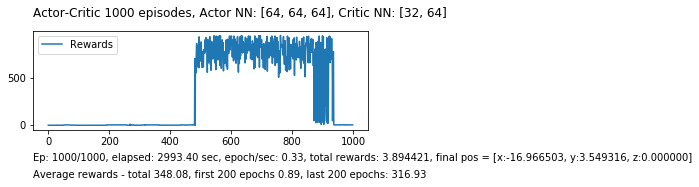

In [15]:
outputs.append(RunDDPGAgent(episodes, configs[5], configs[0], plot_freq = plot_freq))

### 7. Actor NN [32, 32, 32, 32]

Training an Actor-Critic model over 1000 episodes.

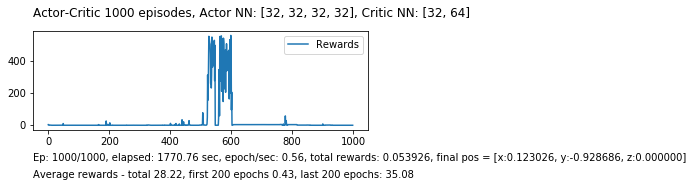

In [16]:
outputs.append(RunDDPGAgent(episodes, configs[6], configs[0], plot_freq = plot_freq))

### 8. Actor NN [64, 128]

Training an Actor-Critic model over 1000 episodes.

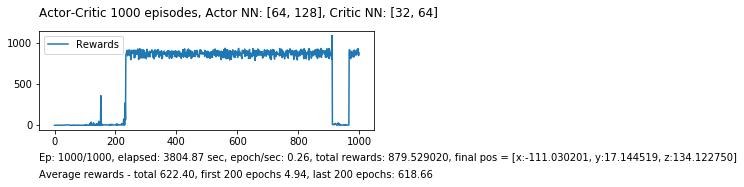

In [17]:
outputs.append(RunDDPGAgent(episodes, configs[7], configs[0], plot_freq = plot_freq))

### 9. Actor NN [32, 64, 128]

Training an Actor-Critic model over 1000 episodes.

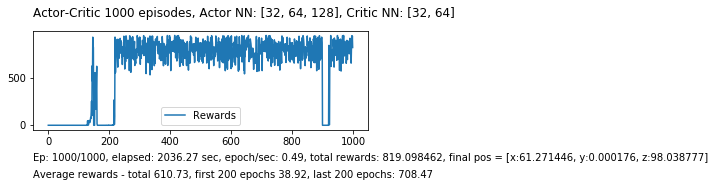

In [24]:
outputs.append(RunDDPGAgent(episodes, configs[8], configs[0], plot_freq = plot_freq))

### Calculating best Actor configuration

The best Actor configuration is configuration no. 9 using [32, 64, 128] hidden layer configuration.

This is calculated by Actor configuration whose average reward of the last 200 episodes is greater.

In [24]:
# Calculating the count of episodes that represent 20% of epochs
percent = math.ceil(episodes * 0.2)

# Finding the best Actor configuration based on the average reward of 
# the last 20% of epochs
best_config = outputs[np.argmax([np.mean(o[4][-percent:]) for o in outputs])]
best_actor_config = best_config[1]
print("The best Actor Neural Network configuration based on average reward of last {} epochs is: {}".format(percent, best_actor_config))

The best Actor Neural Network configuration based on average reward of last 200 epochs is: [32, 64, 128]


## Critic evaluation, fix Actor (best Actor)

From the previous runs that the **best Actor** with configuration [32, 64, 128] and fixed Critic configuration of [32, 64] has produced the highest average reward 752.28. 

The following code keeps the **best Actor** fixed and evaluates the Critic.

Due to the extensive amount of time it takes to train 1000 episode, I chose 3 Critic configurations to evaluate among all available in the `configs` list:

- [64, 64]
- [64, 128]
- [32, 64, 126]

### 10. Critic NN [64, 64]

Training an Actor-Critic model over 1000 episodes.

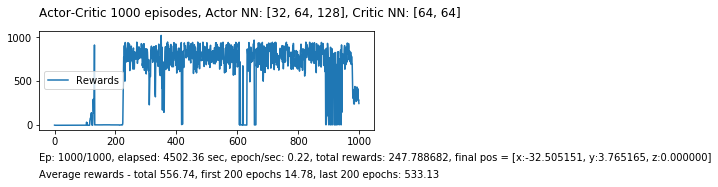

In [19]:
outputs.append(RunDDPGAgent(episodes, best_actor_config, configs[3], plot_freq = plot_freq))

### 11. Critic NN [ 64, 128]

Training an Actor-Critic model over 1000 episodes.

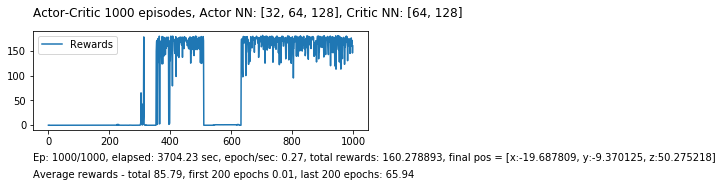

In [18]:
outputs.append(RunDDPGAgent(episodes, best_actor_config, configs[7], plot_freq = plot_freq))

### 12. Critic NN [ 32, 64, 128]

Training an Actor-Critic model over 1000 episodes.

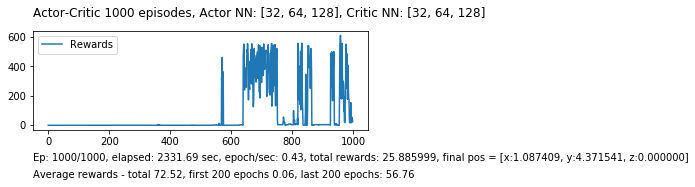

In [17]:
outputs.append(RunDDPGAgent(episodes, best_actor_config, configs[8], plot_freq = plot_freq))

### Calculating best Actor and Critic configuration

In [38]:
# Calculating the count of episodes that represent 20% of epochs
percent = math.ceil(episodes * 0.2)

# Finding the best Actor-Critic configuration based on the average reward of 
# the last 20% of epochs
best_actor_critic = outputs[np.argmax([np.mean(o[4][-percent:]) for o in outputs])]
best_actor_config = best_actor_critic[1]
best_critic_config = best_actor_critic[2]

print("The best Actor-Critic model configuration is Actor NN {}, Critic {}"
      .format(best_actor_config, best_critic_config))

The best Actor-Critic model configuration is Actor NN [32, 64, 128], Critic [32, 64]


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

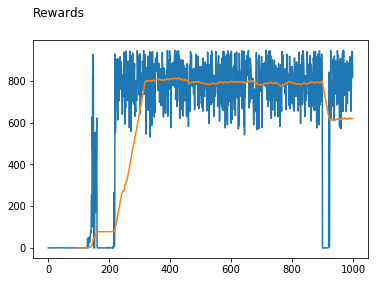

In [39]:
## TODO: Plot the rewards.
rolling_mean = plot_rewards(best_actor_critic[4])

In [41]:
print('Average rewards of all epochs {}'.format(np.mean(best_actor_critic[4])))
print('Average reward of the first 200 epochs {}'.format(np.mean(best_actor_critic[4][:200])))
print('Average reward of the last 200 epochs {}'.format(np.mean(best_actor_critic[4][-200:])))
print('Average reward of the last 10 epochs {}'.format(np.mean(best_actor_critic[4][-10:])))

Average rewards of all epochs 610.7331898390734
Average reward of the first 200 epochs 38.92396045354568
Average reward of the last 200 epochs 708.4691333840495
Average reward of the last 10 epochs 828.0675508545621


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I have used code provided by Udacity as a scaffolding.

**Reward function**

I tried a few reward functions: 

- My first attempt was to use the negative Euclidean distance from the target as a reward (the further the quadcopter is from the target the more negative the reward is) however, from my evaluation this did not yield great results.

- I tried a reward function that tries to reward/penalise based on the direction travelled (i.e. towards the target is rewarded and away from the target is penalised)

- I eventually settled on a variation of the last describe reward function, it gives a reward if the quadcopter gets nearer to the target and receive no points if goes further away.

The formula I applied is:

#### $R = max(0, \alpha * \frac{dist_{prev} - dist_{now}}{1 + dist_{prev}})$ 

where:

- $\alpha$ = 1000, is a reward multiplier. 
- $dist_{prev}$ is the Euclidean distance the quadcopter had before the simulation timestep from the target pose.
- $dist_{now}$ is the Euclidean distance the quadcopter has after the current simulation timestep from the target pose. 

$dist_{prev} - dist_{now}$ is the delta travelled in one timestep, it is divided by $1 + dist_{prev}$ in order to normalise this distance so that if the quadcopter were to slow down due to being close to the target it won't be penalised.


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

Also here I used code provided by Udacity as a scaffolding.

The code uses an Actor-Critic model, as the Actor takes steps in the environment, the Agent stores the actions and environment states in a buffer. Once the buffer has enough samples (threshold specified by the batch size), the Agent takes a random batch from the buffer and triggers the Actor and Critic training. Subsequently, at every step, a new random batch is taken from the buffer and it is used for training the Actor and Critic own Neural Network.

**The final Actor code** has a neural network composed of
- 3 Dense hidden layers of size 32, 64, 128 respectively, each has batch normalisation and ReLu activation

**The final Critic code** has a neural network composed of 5 hidden layers divided as follows:
- 2 Dense hidden layers of size 32 and 64 for the state pathway, each has batch normalisation and ReLu activation
- 2 Dense hidden layers of size 32 and 64 for the action pathway, each has batch normalisation and ReLu activation
- 1 hidden layer to combine the 2 above

**The Agent configuration** is as follows:
- Buffer size: 1,000,000
- Batch size: 32
- Gamma: 0.8

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)


**Answer**:

Actor-Critic learning is very hard task, I had to try numerous different configuration and compare different Neural Network layouts to select the best configuration.

Looking at the last reward plot, we can see that the model takes about 200 episodes to achieve its maximum learning.
The plot shows that the learning is not gradual but it rather jumps at the 200th episode and remains high throughout the training phase, with the exception of a sudden jump down near the 900th episode.

While the rewards achieved by the final configuration is the highest among all trialled with a mean reward score over the last 10 episodes of around 828, however the quadcopter has not learned how to reach the target but rather get closer and not crash.

From my analysis, it seemed that the Actor has had better performances when there were layers with 128 activation compared to only 32. This suggests that trialling a combination of layers with higher number of hidden layers might improve the performance.

Furthermore, more complex networks might need more than 1000 episodes to train.


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

This project has taken a considerable amount of time and has proved to be very hard. The sheer amount of different configurations to try and very long training time has made the project harder. 

Also, the stochastic nature of Neural Networks and the Physics environment makes it hard to maintain consistent results over multiple trials and I found the use of seeding when using Keras, Tensorflow (and low level cuDNN libraries) is inconsistent.

During the first training attempts, I noticed that the quadcopter was ending almost each episode at 0 y coordinate which suggests that the quadcopter crashed on the ground. As the configuration improved, I could notice how the quadcopter had learned to hover, and many episodes where ending with the quadcopter at roughly the same altitude, though not really near the target. Although not on target, it has been interesting and rewarding to notice that.